In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [3]:
df= pd.read_csv("bank_marketing_part1_Data.csv")
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


# 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [14]:
x= df.corr()
x

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


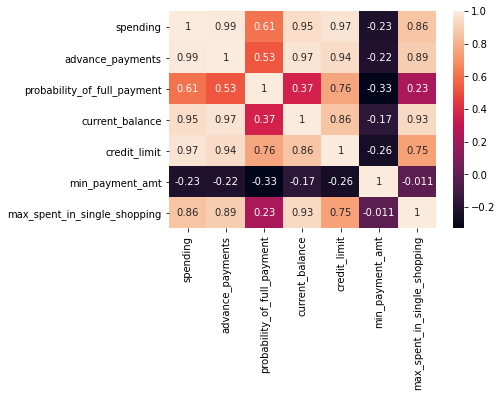

In [15]:
sns.heatmap(x,annot=True);

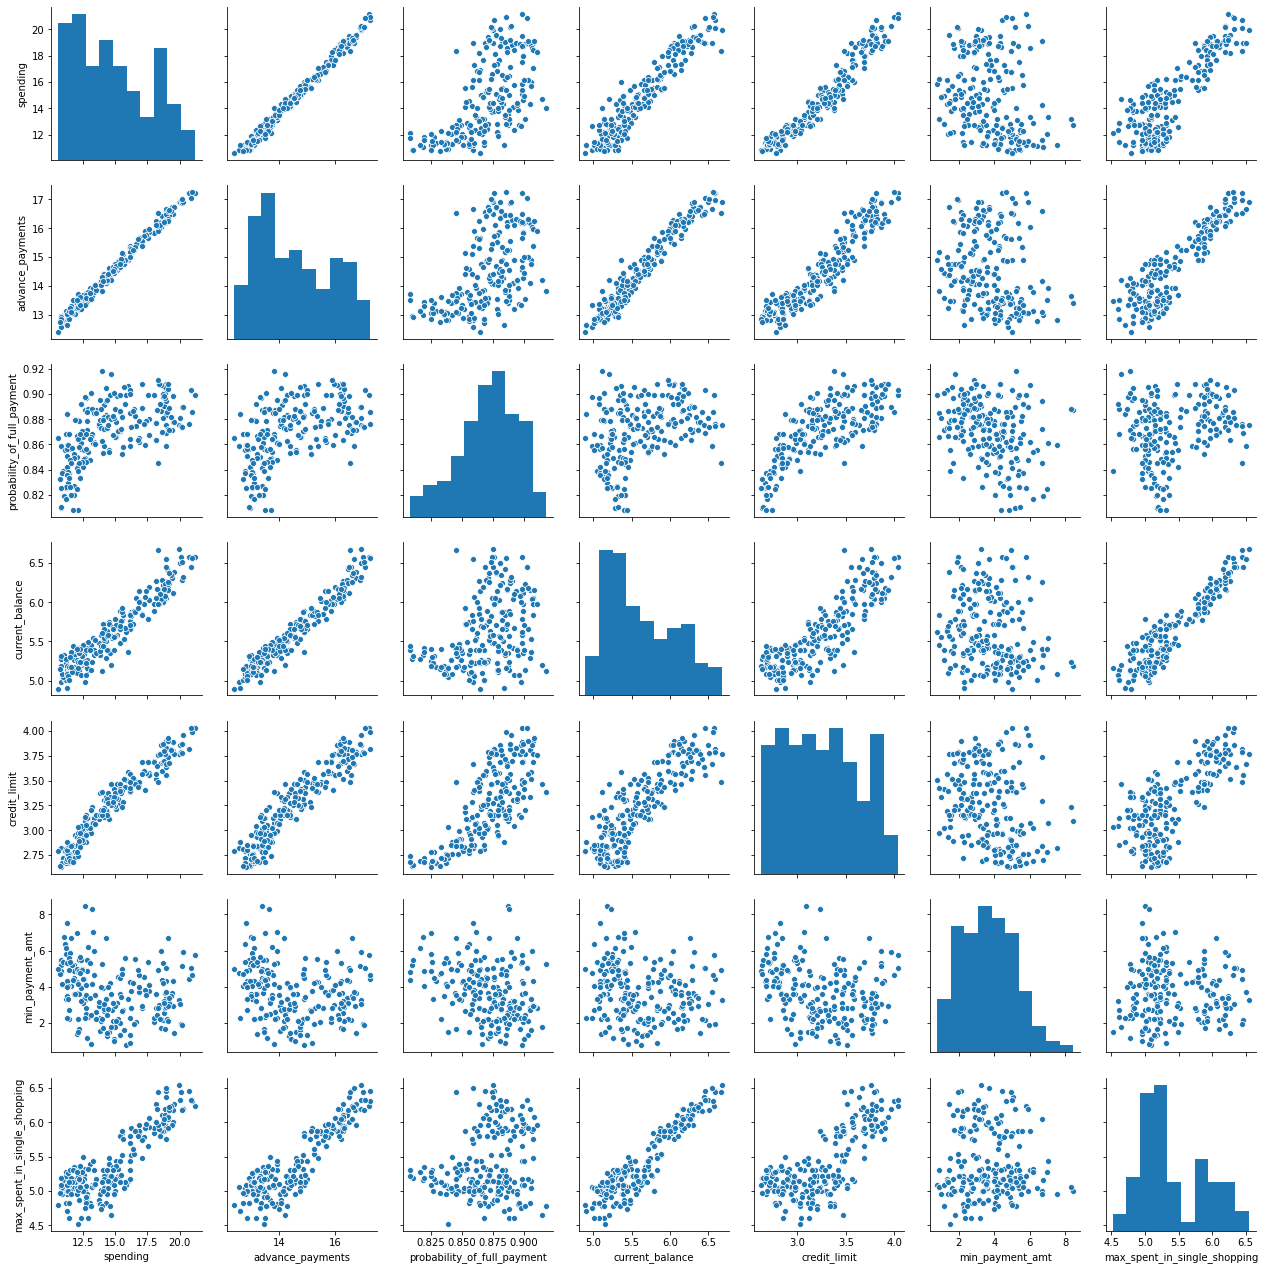

In [17]:
sns.pairplot(df);

## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [18]:
from sklearn.preprocessing import StandardScaler

In [22]:
std_scaler=StandardScaler()
scaled_df=std_scaler.fit_transform(df)
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [49]:
wardlink = linkage(scaled_df, method = 'ward')

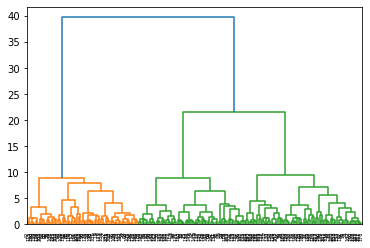

In [50]:
dend = dendrogram(wardlink)

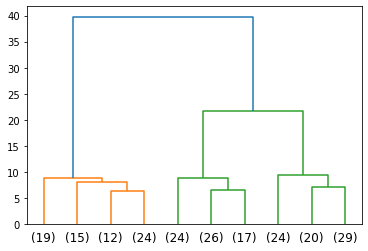

In [54]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [29]:
from scipy.cluster.hierarchy import fcluster

In [34]:
clusters = fcluster(wardlink,20, criterion='distance')
clusters

array([1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 2,
       1, 3, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       3, 1, 3, 1, 1, 3, 1, 2, 2, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 2, 2, 3, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 2, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2], dtype=int32)

In [38]:
df['clusters'] = clusters
df.head(15)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,3
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,3
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,2
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3


In [41]:
pd.crosstab(df["clusters"],df["spending"])

spending,10.59,10.74,10.79,10.80,10.82,10.83,10.91,10.93,11.02,11.14,...,19.94,20.03,20.10,20.16,20.20,20.24,20.71,20.88,20.97,21.18
clusters,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df.groupby("clusters").mean()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
clusters,,,,,,,
1,18.615873,16.259524,0.883937,6.194603,3.708143,3.659413,6.060952
2,14.920164,14.579344,0.881487,5.608033,3.314852,2.684805,5.221951
3,12.035465,13.299535,0.854081,5.228395,2.889395,4.450303,5.061814


## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [48]:
from sklearn.cluster import KMeans

In [55]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)

KMeans(n_clusters=3)

In [58]:
k_means.inertia_

430.6589731513006

In [60]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
k_means.inertia_

659.171754487041

In [61]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

371.74655984791394

In [62]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

328.02546798364074

In [63]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

1469.9999999999998

In [64]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

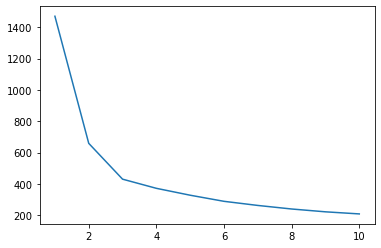

In [65]:
plt.plot(range(1,11), wss)

In [66]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [67]:
df["Clusters_kmeans"] = labels
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clusters_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [69]:
silhouette_score(scaled_df,labels)

0.4007270552751299

In [3]:
df2= pd.read_csv("insurance_part2_data.csv")
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [5]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        df2[feature] = pd.Categorical(df2[feature]).codes

In [24]:
df2.describe()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,1.306333,0.612333,0.308000,14.529203,0.984667,70.001333,60.249913,1.661667,0.250000
std,10.463518,0.994060,0.487299,0.461744,25.481455,0.122895,134.053313,70.733954,1.258726,0.575277
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,20.000000,1.000000,0.000000
50%,36.000000,2.000000,1.000000,0.000000,4.630000,1.000000,26.500000,33.000000,2.000000,0.000000
75%,42.000000,2.000000,1.000000,1.000000,17.235000,1.000000,63.000000,69.000000,2.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,210.210000,1.000000,4580.000000,539.000000,4.000000,2.000000


In [25]:
corr= df2.corr()

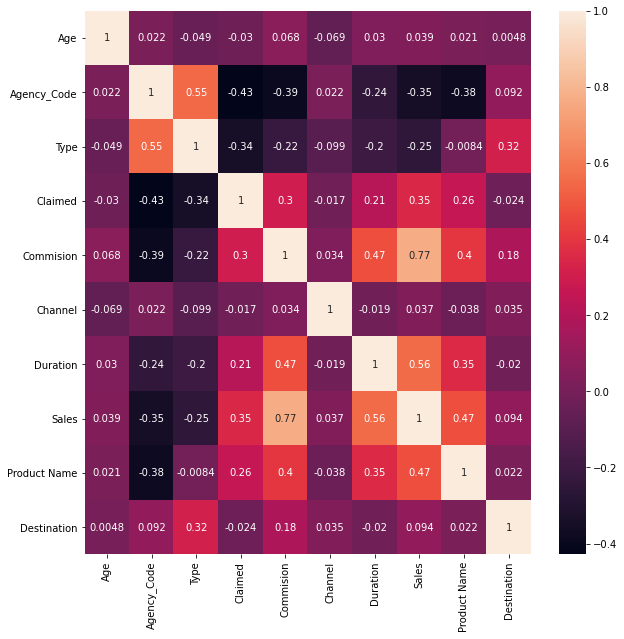

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True);

In [27]:
df2.skew()

Age              1.149713
Agency_Code     -0.155126
Type            -0.461352
Claimed          0.832185
Commision        3.148858
Channel         -7.892734
Duration        13.784681
Sales            2.381148
Product Name     0.432670
Destination      2.188556
dtype: float64

## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df2.drop(["Claimed","Agency_Code"], axis=1)
y = df2.pop("Claimed")

In [8]:
X_train,X_test,train_labels,test_labels=train_test_split(X,y,test_size=0.30,random_state=1)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix


In [79]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [80]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [81]:
from sklearn import tree

train_char_label = ['no', 'yes']
dt_regularized = open('dt_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= dt_regularized , feature_names = list(X_train), class_names = list(train_char_label))

dt_regularized.close()
dot_data

In [18]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Product Name  0.562017
Commision     0.256813
Sales         0.151064
Duration      0.020293
Destination   0.009813
Age           0.000000
Type          0.000000
Channel       0.000000


In [82]:
reg_dt_model=DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

In [84]:
y_predict = reg_dt_model.predict(X_test)
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.577586,0.422414
1,0.476190,0.523810
2,0.481132,0.518868
3,0.363636,0.636364
4,0.987179,0.012821


In [ ]:
#AUC And ROC for testing and training data 

In [85]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)

AUC: 0.838


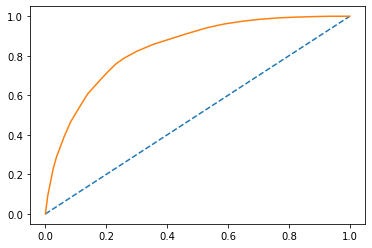

In [86]:
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr)

In [87]:
probstest = best_grid.predict_proba(X_test)
probstest = probstest[:, 1]
cart_test_auc = roc_auc_score(test_labels, probstest)
print('AUC: %.3f' % cart_test_auc)

AUC: 0.818


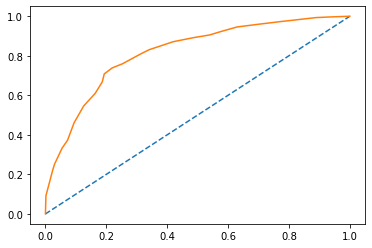

In [88]:
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(test_labels, probstest)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

In [ ]:
#Confusion Matrix and Accuracy for Train and Test data

In [89]:
confusion_matrix(test_labels, y_predict)

array([[529,  76],
       [134, 161]])

In [90]:
y_trainpredict = reg_dt_model.predict(X_train)
confusion_matrix(train_labels, y_trainpredict)

array([[1268,  203],
       [ 248,  381]])

In [91]:
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7666666666666667

In [92]:
print(classification_report(test_labels, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       605
           1       0.68      0.55      0.61       295

    accuracy                           0.77       900
   macro avg       0.74      0.71      0.72       900
weighted avg       0.76      0.77      0.76       900



In [34]:
cart_train_acc=best_grid.score(X_train,train_labels)
cart_train_acc

0.7852380952380953

In [93]:
print(classification_report(train_labels, y_trainpredict))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1471
           1       0.65      0.61      0.63       629

    accuracy                           0.79      2100
   macro avg       0.74      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



In [94]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.59
cart_train_recall  0.59
cart_train_f1  0.59


In [95]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.64
cart_test_recall  0.51
cart_test_f1  0.56


In [97]:
param_grid = {
    'max_depth': [10],
    'max_features': [5],
    'min_samples_leaf': [50],
    'min_samples_split': [150],
    'n_estimators': [100] 
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [98]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10], 'max_features': [5],
                         'min_samples_leaf': [50], 'min_samples_split': [150],
                         'n_estimators': [100]})

In [99]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 100}

In [100]:
best_grid = grid_search.best_estimator_

In [101]:
best_grid

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=50,
                       min_samples_split=150, random_state=1)

In [57]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Product Name  0.429558
Commision     0.189206
Sales         0.182035
Type          0.126329
Duration      0.033010
Age           0.032034
Destination   0.007828
Channel       0.000000


In [102]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [103]:
confusion_matrix(train_labels,ytrain_predict)

array([[1350,  121],
       [ 339,  290]])

In [104]:
confusion_matrix(test_labels,ytest_predict)

array([[566,  39],
       [188, 107]])

In [50]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.780952380952381

In [105]:
rf_test_acc=best_grid.score(X_test,test_labels) 
rf_test_acc

0.7477777777777778

In [106]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1471
           1       0.71      0.46      0.56       629

    accuracy                           0.78      2100
   macro avg       0.75      0.69      0.71      2100
weighted avg       0.77      0.78      0.77      2100



In [107]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83       605
           1       0.73      0.36      0.49       295

    accuracy                           0.75       900
   macro avg       0.74      0.65      0.66       900
weighted avg       0.74      0.75      0.72       900



Area under Curve is 0.8305004328517744


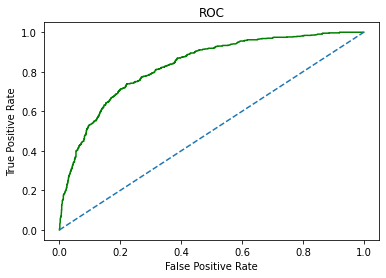

In [108]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

Area under Curve is 0.8059896344025774


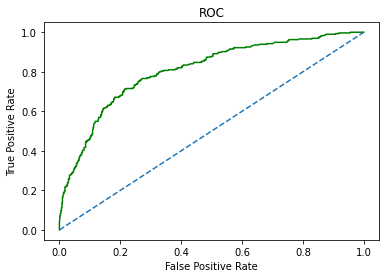

In [109]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [110]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.71
rf_train_recall  0.46
rf_train_f1  0.56


In [111]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.73
rf_test_recall  0.36
rf_test_f1  0.49


In [58]:
param_grid = {
    'hidden_layer_sizes': [250], 
    'max_iter': [1000], 
    'solver': ['adam'], 
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [59]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 250, 'max_iter': 1000, 'solver': 'adam', 'tol': 0.01}

In [60]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=250, max_iter=1000, random_state=1, tol=0.01)

In [61]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [62]:
confusion_matrix(train_labels,ytrain_predict)

array([[1212,  259],
       [ 256,  373]])

In [63]:
confusion_matrix(test_labels,ytest_predict)

array([[521,  84],
       [146, 149]])

In [64]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7444444444444445

In [65]:
nn_train_acc=best_grid.score(X_train,train_labels)
nn_train_acc

0.7547619047619047

In [66]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       605
           1       0.64      0.51      0.56       295

    accuracy                           0.74       900
   macro avg       0.71      0.68      0.69       900
weighted avg       0.73      0.74      0.74       900



In [67]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1471
           1       0.59      0.59      0.59       629

    accuracy                           0.75      2100
   macro avg       0.71      0.71      0.71      2100
weighted avg       0.76      0.75      0.75      2100



In [68]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.64
nn_test_recall  0.51
nn_test_f1  0.56


In [112]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.71
nn_train_recall  0.46
nn_train_f1  0.56


Area under Curve is 0.7662165569407481


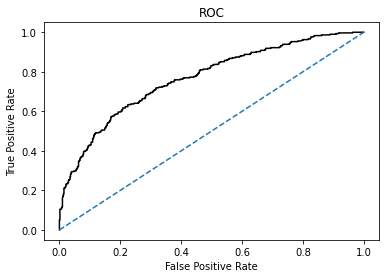

In [70]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

Area under Curve is 0.8092463839854571


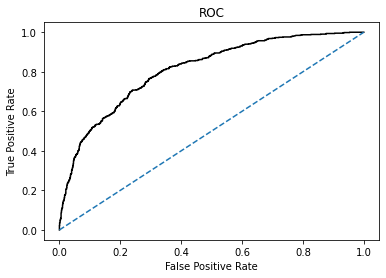

In [72]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

# 2.3 Final Model: Compare all the model and write an inference which model is best/optimized.

In [113]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.77,0.78,0.75,0.75,0.74
AUC,0.84,0.82,0.83,0.81,0.81,0.81
Recall,0.59,0.51,0.46,0.36,0.46,0.51
Precision,0.59,0.64,0.71,0.73,0.71,0.64
F1 Score,0.59,0.56,0.56,0.49,0.56,0.56


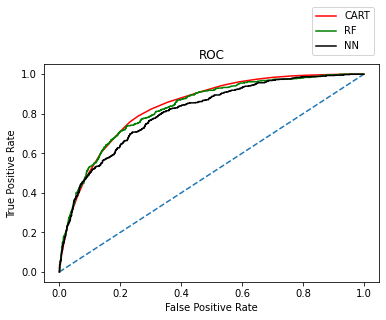

In [114]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

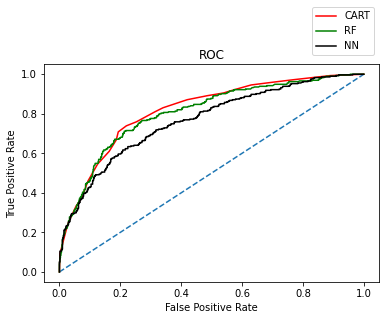

In [115]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')